# Image Processing Notebook Descriptions
### 1. Importing Libraries & Setup

**Purpose:**

- We import OpenCV, Pillow, NumPy, and Matplotlib for image processing, visualization, and basic matrix operations.
- We also define a helper function show_img() to display images properly inside Kaggle/Jupyter.

In [1]:
!pip install opencv-python pillow matplotlib --quiet

In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
def show_img(img, title="Image"):
    plt.figure(figsize=(6, 6))
    if len(img.shape) == 3:  # Color image
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:  # Grayscale image
        plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

### 2. Loading & Displaying Images

**What:**
We load an image from disk using OpenCV (cv2.imread()) and visualize it using Matplotlib.

**Why:**

OpenCV loads images in BGR format.

Matplotlib expects RGB, so we convert it.

Useful to understand the original image before processing.

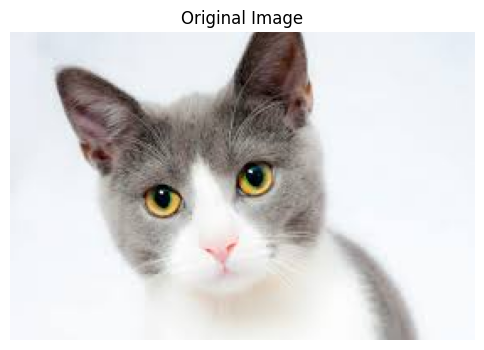

Shape: (183, 276, 3)
Height: 183, Width: 276, Channels: 3


In [4]:
# Load an image
img = cv2.imread("/kaggle/input/test-dataset/download.jpeg")  # Change path accordingly
show_img(img, "Original Image")

# Check basic properties
print(f"Shape: {img.shape}")
print(f"Height: {img.shape[0]}, Width: {img.shape[1]}, Channels: {img.shape[2]}")


### 3. Resizing, Cropping & Flipping

**What:**

Resizing: Changes the image size using cv2.resize().

Cropping: Extracts a region of interest (ROI) from the image.

Flipping: Mirrors the image horizontally, vertically, or both.

**Why:**

Resize → Standardize image size for ML/CV models.

Crop → Focus on specific areas.

Flip → Useful for data augmentation in deep learning.

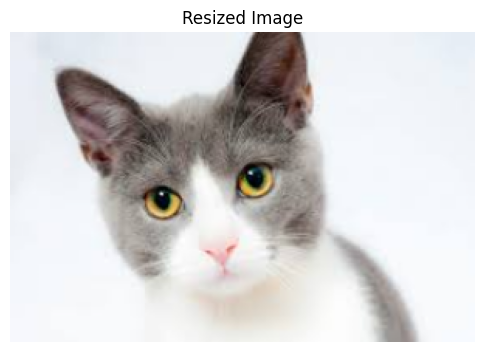

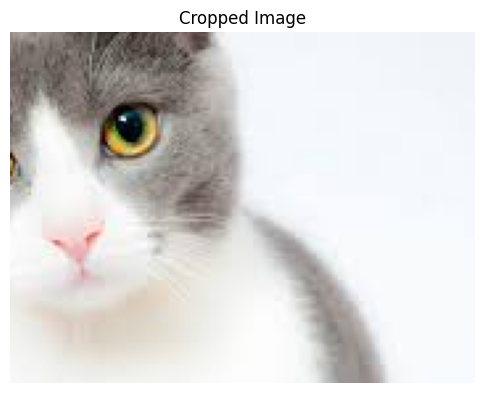

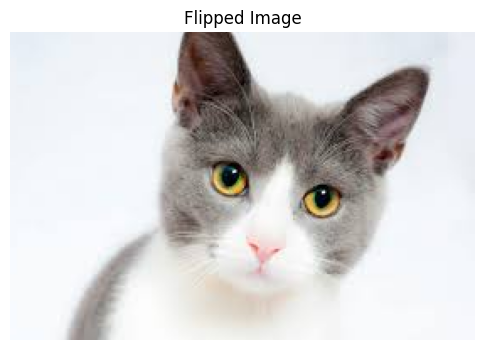

In [5]:
# Resize
resized_img = cv2.resize(img, (300, 200))
show_img(resized_img, "Resized Image")

# Crop
cropped_img = img[50:200, 100:300]  # y1:y2, x1:x2
show_img(cropped_img, "Cropped Image")

# Flip (0=Vertical, 1=Horizontal, -1=Both)
flipped_img = cv2.flip(img, 1)
show_img(flipped_img, "Flipped Image")


### 4. Color Space Conversions

**What:**

Convert between different color models using cv2.cvtColor().

BGR → RGB

BGR → GRAY

BGR → HSV

**Why:**

RGB → Correct visualization.

Grayscale → Reduces computation, used in edge detection.

HSV → Better color-based segmentation.

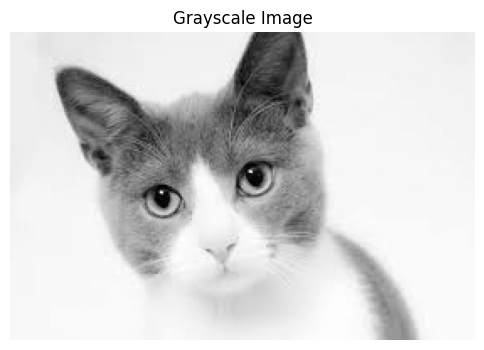

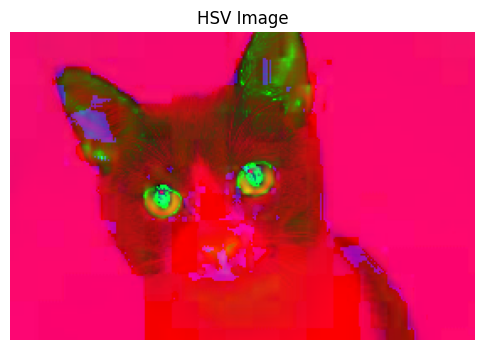

In [7]:
# Convert to Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(gray_img, "Grayscale Image")

# Convert to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show_img(hsv_img, "HSV Image")


### 5. Drawing Shapes & Adding Text

**What:**

Draw rectangles, circles, lines, and add text using OpenCV functions.

**Why:**

Helpful for annotations, marking objects, or visualizing detection results.

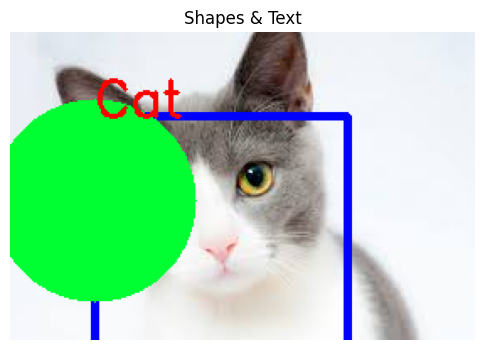

In [13]:
img_copy = img.copy()

# Draw a rectangle
cv2.rectangle(img_copy, (50, 50), (200, 200), (255, 0, 0), 3)

# Draw a circle
cv2.circle(img_copy, (50, 100), 60, (50, 255, 0), -1)

# Add text
cv2.putText(img_copy, "Cat", (50, 50),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

show_img(img_copy, "Shapes & Text")


## 6. Image Blurring & Noise Reduction
### a) Gaussian Blur

**What:**
Applies a weighted average of nearby pixels using a Gaussian kernel.

**Why:**

Removes small noise.

Smoothens the image.

Useful before edge detection.

### b) Median Blur

**What:**
Replaces each pixel with the median value of its neighborhood.

**Why:**

Removes salt & pepper noise.

Preserves edges better than Gaussian blur.

### c) Bilateral Filtering

**What:**
Smooths the image while keeping edges sharp.

**Why:**

Ideal for tasks like cartoon effects or background noise removal.

Best when you want to denoise but keep object boundaries.

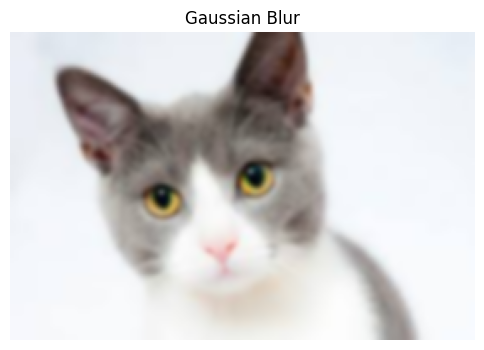

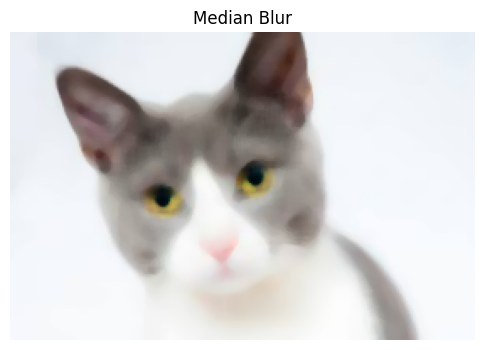

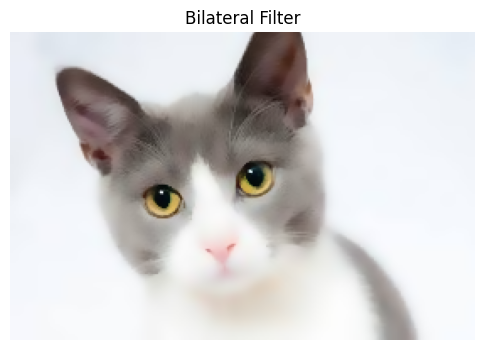

In [14]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(img, (7, 7), 0)
show_img(gaussian_blur, "Gaussian Blur")

# Median Blur
median_blur = cv2.medianBlur(img, 7)
show_img(median_blur, "Median Blur")

# Bilateral Filter (Preserve edges)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
show_img(bilateral, "Bilateral Filter")


## 7. Edge Detection

### a) Canny Edge Detection

**What:**
Uses a multi-step algorithm:

Smooth the image.

Detect strong & weak edges.

Keep only clean edges.

**Why:**

Produces thin, clean edges.

Great for object detection and segmentation.

### b) Sobel Edge Detection

**What:**

Calculates intensity gradients along X and Y directions.

**Why:**

Highlights all regions where brightness changes rapidly.

Produces thicker, noisier edges than Canny.

Good for studying intensity variations.

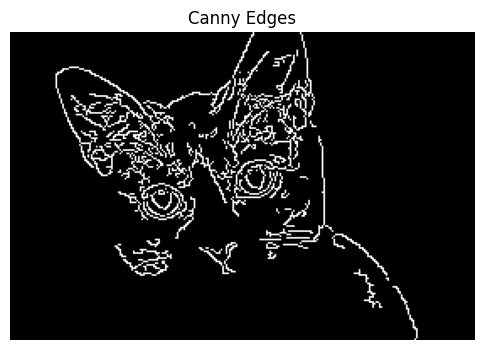

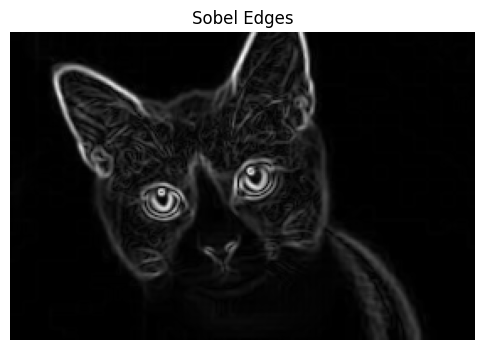

In [15]:
# Canny Edge Detection
canny_edges = cv2.Canny(img, 100, 200)
show_img(canny_edges, "Canny Edges")

# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
show_img(sobel_combined, "Sobel Edges")


### 8. Image Histograms

**What:**
Visualize pixel intensity distributions for grayscale and color images using Matplotlib.

**Why:**

Understand brightness levels.

Useful for thresholding, contrast adjustments, and image enhancements.

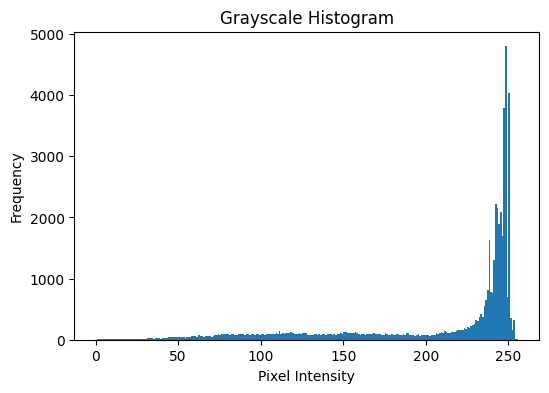

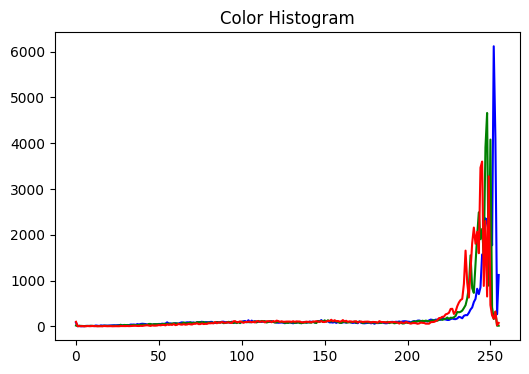

In [16]:
# Histogram for grayscale image
plt.figure(figsize=(6, 4))
plt.hist(gray_img.ravel(), 256, [0, 256])
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Histogram for RGB image
color = ('b', 'g', 'r')
plt.figure(figsize=(6, 4))
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title("Color Histogram")
plt.show()


## 9. Saving Processed Images

**What:**
Save any processed image using cv2.imwrite().

**Why:**

Keeps outputs for later experiments.

Useful when training ML/CV models.

In [17]:
# Save outputs to Kaggle's working directory
cv2.imwrite("/kaggle/working/blurred_cat.jpg", gaussian_blur)
cv2.imwrite("/kaggle/working/canny_edges.jpg", canny_edges)
print("Images saved successfully ✅")


Images saved successfully ✅
